# Analyzing Tabular Data with Pandas

In many analyses, it is useful to organize data in a tabular format.
Tables are great because they allow us to store heterogeneous data and
assign names to columns which makes exploration more intuitive. The most
popular library for working with tabular data in Python is called
`pandas` which derives from **pan**el **da**ta. In this section we are
going to learn how to use `pandas` and how it interfaces with other
tools to create a powerful ecosystem for data analysis. At the core of
pandas is the `DataFrame` - an object that stores two-dimensional
tabular data. Variables that store data frames are commonly called `df`.
Most of pandas functionalities come as so called methods of the data
frame object. Methods are called by typing the variable name and the
method name separated by a dot. For example: `df.head()` will call the
`.head()` method of the data frame `df`. If you are not used to this
syntax, don’t worry - all sections contain examples for how the
respective methods are used.

To install the packages required for this session, execute the cell
below.

In [1]:
!pip install pandas seaborn pingouin

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.11/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

## Reading and Writing Tabular Data

There are many different file formats for tabular data that pandas
supports (for a full list, see [this
website](https://pandas.pydata.org/docs/user_guide/io.html)). One of the
most commonly used formats is CSV which stands for comma-separated
values. A CSV file contains plain text where items are separated by
commas. Because it is plain text, CSV is independent of the programming
language which makes it a useful interoperable standard. In this
section, we are going to learn how to read data from a CSV file into
`pandas` and how to write it back to the CSV format.

| Code | Description |
|------------------------------------|------------------------------------|
| `import pandas as pd` | Import the `pandas` module under the alias `pd` |
| `df = pd.read_csv("mydata.csv")` | Read the file `"mydata.csv"` into a pandas data frame and assign it to the variable `df` |
| `df.head(5)` | Print the first 5 rows of `df` |
| `df.to_csv("mydata.csv")` | Read the file `"mydata.csv"` into a pandas data frame and assign it to the variable `df` |

<span class="theorem-title">**Exercise 1**</span> Import the `pandas`
library under the alias `pd`.

*Solution.*

In [2]:
import pandas as pd

<span class="theorem-title">**Exercise 2**</span> Read the file
`salaries.csv` into a data frame and assign it to a variable called
`df`.

*Solution.*

In [4]:
df = pd.read_csv("salaries.csv")

<span class="theorem-title">**Exercise 3**</span> Print the first 3 rows
of the data frame `df`.

*Solution.*

In [6]:
df.head(3)

<span class="theorem-title">**Exercise 4**</span> Get the first 3 rows
of `df` and assign them to another variable called `new_df`. Write
`new_df` to a file called `new_salaries.csv`.

*Solution.*

In [8]:
new_df = df.head(3)
new_df.to_csv("new_salaries.csv")

<span class="theorem-title">**Exercise 5**</span> Open
`new_salaries.csv` in your editor (simply click on it in the file
explorer) and manually edit the file to append a new individual with
name `Jim` age `32` city `Kansas`, salary `72000` and Department `HR`.
Save the edited file, then load `new_salaries.csv` and print it to make
sure your edit was stored.

*Solution.*

In [9]:
pd.read_csv("new_salaries.csv")

## Exploring a Data Set in Pandas

Now that we know how to read CSV files, we can start working with some
actual data! In this section, we are going to analyze demographic data
from passengers of the Titanic which are stored in the file
`titanic.csv`. Once we loaded the data into a data frame, we can access
a given column by providing its name as a string inside square brackets.
For example, `df["age"]` will return the column `"age"` in the data
frame `df`. By extracting individual columns and using methods like
`.max()` or `.mean()`, one can quickly get an overview of the data
stored in a table.

| Code | Description |
|------------------------------------|------------------------------------|
| `df["var1"]` | Access the column with the name `"var1"` in `df` |
| `df["var1"].min()` | Get the minimum value of column `"var1"` |
| `df["var1"].max()` | Get the maximum value of column `"var1"` |
| `df["var1"].mean()` | Compute the mean value of column `"var1"` |
| `df["var1"].unique()` | Get all unique values of column `"var1"` |
| `df["var1"].value_counts()` | Get all unique values of column `"var1"` |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 6**</span> Read the file
`titanic.csv` into a pandas data frame and assign it to the variable
`df`.

*Solution.*

In [10]:
df = pd.read_csv("titanic.csv")

<span class="theorem-title">**Exercise 7**</span> Get the column
`"survived"` from `df`.

*Solution.*

In [12]:
df["survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

<span class="theorem-title">**Exercise 8**</span> What is the mean fare
that passengers on the Titanic paid?

*Solution.*

In [14]:
df["fare"].mean()

np.float64(32.204207968574636)

<span class="theorem-title">**Exercise 9**</span> What is the minimum
and maximum `"age"` of the Titanic’s passengers?

*Solution.*

In [16]:
print(df["age"].min())
print(df["age"].max())

0.42
80.0

<span class="theorem-title">**Exercise 10**</span> What are the
different `"deck"`s on the Titanic?

*Solution.*

In [18]:
df["deck"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

<span class="theorem-title">**Exercise 11**</span> What is the most
common `"embark_town"` for passengers of the Titanic?

*Solution.*

In [20]:
df["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

## Filtering a Data Frame

Just like arrays, a data frame can be filtered using Boolean masks. The
process is exactly the same: you create a mask of `True` and `False`
values by applying a logical condition to a data frame. Then, you apply
it to the data frame to extract the values where the mask equals `True`.
This is very useful for statistical analysis. For example, we could
check whether the average age of passengers differs between sexes by
extracting the values where `df["sex"]=="male"` and
`df["sex"]=="female"` and computing their respective means.

| Code | Description |
|------------------------------------|------------------------------------|
| `mask = df["var2"]=="a"` | Create a `mask` of Boolean values that is `True` where the value of column `"var1"` is `"a"` and `False` otherwise |
| `mask = df["var1"]>=0` | \<;Create a `mask` of Boolean values that is `True` where the value of column `"var1"` is greater or equal to `0` and `False` otherwise |
| `mask = df["var1"].isin([1,2,3])` | Create a `mask` of Boolean values that is `True` where the value of column `"var1"` is contained in the list `[1,2,3]` and `False` otherwise |
| `df_filtered = df[mask]` | Get the rows of `df` where the `mask` is `True` and assign this new, filtered, data frame to a variable `df_filtered` |

<span class="theorem-title">**Exercise 12**</span> Get the data from all
passengers on `deck` E.

*Solution.*

In [22]:
mask = df["deck"] == "E"
df[mask]

<span class="theorem-title">**Exercise 13**</span> Is the survival rate
higher for male or female passengers?

*Solution.*

In [24]:
mask = df["sex"] == "male"
print(df[mask]["survived"].mean())
print(df[~mask]["survived"].mean())

0.18890814558058924
0.7420382165605095

<span class="theorem-title">**Exercise 14**</span> What was the average
`fare` paid by passengers that survived and those that didn’t?

*Solution.*

In [26]:
mask = df["survived"]==1
print(df[mask]["fare"].mean())
print(df[~mask]["fare"].mean())

48.39540760233918
22.117886885245902

<span class="theorem-title">**Exercise 15**</span> How are the
passengers in `"pclass"` 1 distributed across the `"embark_town"`s
compared to those in `"pclass"` 3?

*Solution.*

In [28]:
mask = df["pclass"]==1
print(df[mask]["embark_town"].value_counts())
mask = df["pclass"]==3
print(df[mask]["embark_town"].value_counts())

embark_town
Southampton    127
Cherbourg       85
Queenstown       2
Name: count, dtype: int64
embark_town
Southampton    353
Queenstown      72
Cherbourg       66
Name: count, dtype: int64

## The Pandas Ecosystem

Another advantage of `pandas` is its integration with other software
which creates a powerful ecosystem for data analysis. In this section we
are going to explore two such libraries: `seaborn`, a tool for
visualizations and `pingouin`, a package for statistical analysis. Both
libraries provide a similar interface where you pass a data frame as
`data` and specify variables based on their column name. This
homogeneous interface makes data analysis within the pandas framework
very convenient.

### Visualization with Seaborn

| Code | Description |
|------------------------------------|------------------------------------|
| `import seaborn as sns` | Import the seaborn library under the alias `sns` |
| `sns.catplot(data=df, x='var1', y='var2')` | Create a `cat`egorical plot for the data frame `df` with `"var1"` on the x-axis and `"var2"` on the y-axis |
| `sns.catplot(data=df, x='var1', y='var2', kind="violin")` | Plot the same data but as a violin plot |
| `sns.catplot(data=df, x='var1', y='var2', hue="var3")` | Plot the same data but add color or `hue` to encode `"var3"` |

<span class="theorem-title">**Exercise 16**</span> Import the `seaborn`
library under the alias `sns`.

*Solution.*

In [30]:
import seaborn as sns

<span class="theorem-title">**Exercise 17**</span> Create a `catplot` to
visualize the distribution of `"fare"` across the different classes
(`"pclass"`).

*Solution.*

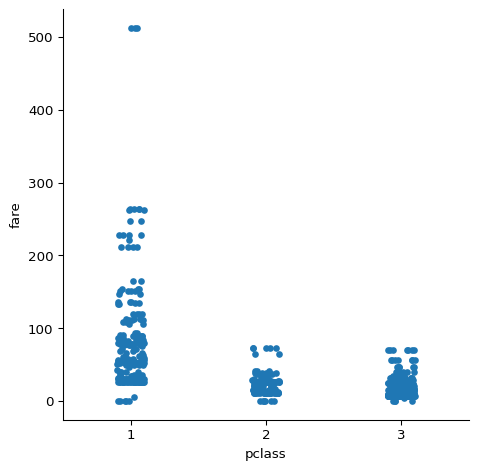

In [32]:
sns.catplot(data=df, x="pclass", y="fare")

<span class="theorem-title">**Exercise 18**</span> Create a bar plot for
the same data by specifying `kind="bar"`.

*Solution.*

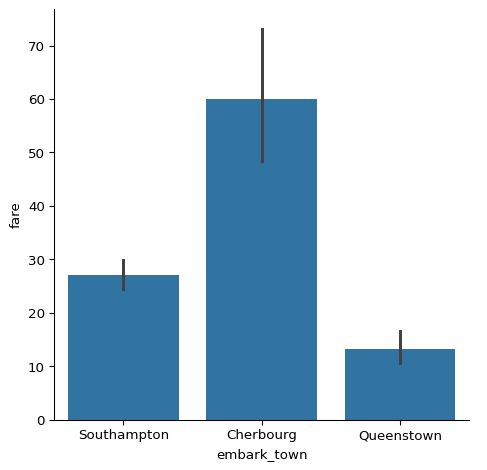

In [34]:
sns.catplot(data=df, x="embark_town", y="fare", kind="bar")

<span class="theorem-title">**Exercise 19**</span> Add a color or `hue`
to the bar plot to encode passenger `sex`.

*Solution.*

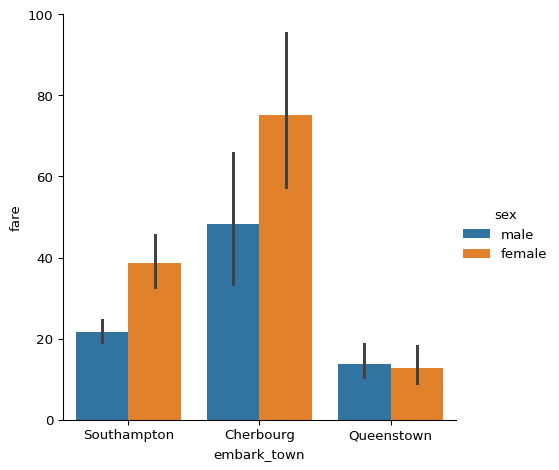

In [36]:
sns.catplot(data=df, x="embark_town", y="fare", kind="bar", hue="sex")

### Statistical Analysis with Pingouin

| Code | Description |
|------------------------------------|------------------------------------|
| `import pingouin as pg` | Import the `pingouin` library under the alias `pg` |
| `pg.anova(data=df, dv="var1", between="var2")` | Perfom an analysis of variance (ANOVA) to compare the difference in the dependent variable `"var1"` between groups in `"var2"` |

<span class="theorem-title">**Exercise 20**</span> Import the `pingouin`
library under the alias `pg`.

*Solution.*

In [38]:
import pingouin as pg

<span class="theorem-title">**Exercise 21**</span> Perform an analysis
of variance (ANOVA) to compare the difference in the dependent variable
`"fare"` between `"embark_town"`s.

*Solution.*

In [40]:
pg.anova(data=df, dv="fare", between="embark_town")

<span class="theorem-title">**Exercise 22**</span> Calculate the
pairwise correlations for all columns in `df`. Assign the data frame
returned by `pg.pariwise_corr` to a new variable called `df_corr` and
print the columns `"X"`, `"Y"` and `"r"`

*Solution.*

In [42]:
df_corr = pg.pairwise_corr(data=df)
df_corr[["X", "Y", "r"]]